# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')

In [3]:
#para facilitar a visualização, abaixo serão selecionadas apenas as variáveis que serão utilizadas nesta análise
sinasc = sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 
 'CONSULTAS']]

In [4]:
sinasc.head()

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,4
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,4
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,4
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,3
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,4


In [5]:
sinasc.isna().sum()

APGAR1         96
APGAR5        103
SEXO            4
GESTACAO     1232
ESTCIVMAE     317
CONSULTAS       0
dtype: int64

In [6]:
#tratando os dados faltantes
#as colunas nas quais as informações de APGAR1 e APGAR5 não foram preenchidas foram excluídas
sinasc = sinasc[~sinasc['APGAR5'].isna() & ~sinasc['APGAR1'].isna()]

#os dados faltantes de GESTACAO e ESTCIVMAE foram considerados como Ignorado, representado pelo código 9.0 na variável ESTCIVMAE
sinasc['GESTACAO'].fillna('Ignorado', inplace=True)
#os dados faltantes da variável SEXO foram preenchidos com o Masculino, que é o valor de maior frequencia 
sinasc['ESTCIVMAE'].fillna(9.0, inplace=True)
sinasc['SEXO'].fillna('Masculino', inplace=True)

In [7]:
sinasc.isna().sum()

APGAR1       0
APGAR5       0
SEXO         0
GESTACAO     0
ESTCIVMAE    0
CONSULTAS    0
dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

<AxesSubplot:xlabel='APGAR5', ylabel='count'>

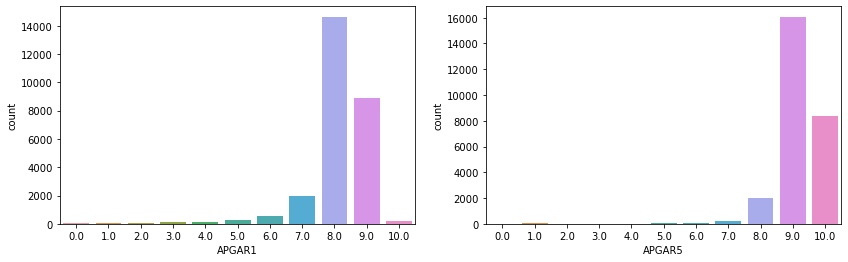

In [8]:
plt.rc('figure', figsize=(14, 4))
fig, axes = plt.subplots(1, 2)
sns.countplot(ax = axes[0], x='APGAR1', data=sinasc)
sns.countplot(ax = axes[1], x='APGAR5', data=sinasc)


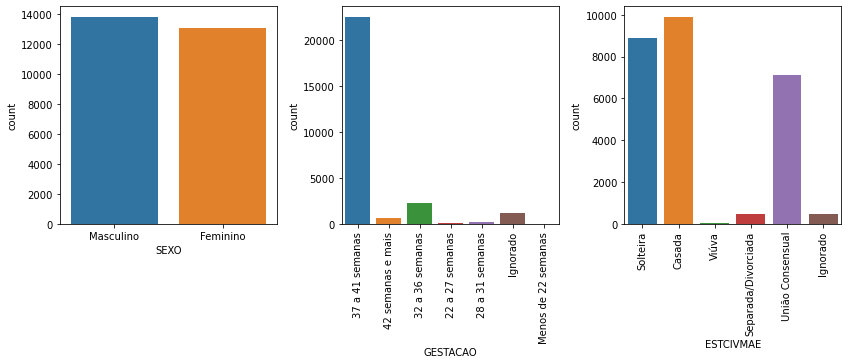

In [9]:
plt.close('all')
fig, axes = plt.subplots(1, 3)

sns.countplot(ax = axes[0], x='SEXO', data=sinasc)
ax2 = sns.countplot(ax = axes[1], x='GESTACAO', data=sinasc)
ax3 = sns.countplot(ax = axes[2], x='ESTCIVMAE', data=sinasc)

plt.subplots_adjust(wspace=0.3)
ax2.tick_params(axis='x', rotation=90)
label = ax3.set_xticklabels(['Solteira', 'Casada', 'Viúva', 'Separada/Divorciada', 'União Consensual', 'Ignorado'], 
                            rotation = 90)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

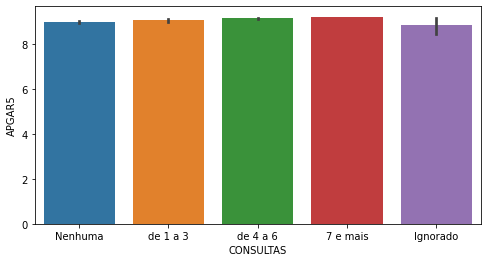

In [10]:
plt.rc('figure', figsize=(8, 4))
ax = sns.barplot(x='CONSULTAS', y='APGAR5', data=sinasc)
labels = ax.set_xticklabels(['Nenhuma', 'de 1 a 3', 'de 4 a 6', '7 e mais', 'Ignorado'])

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

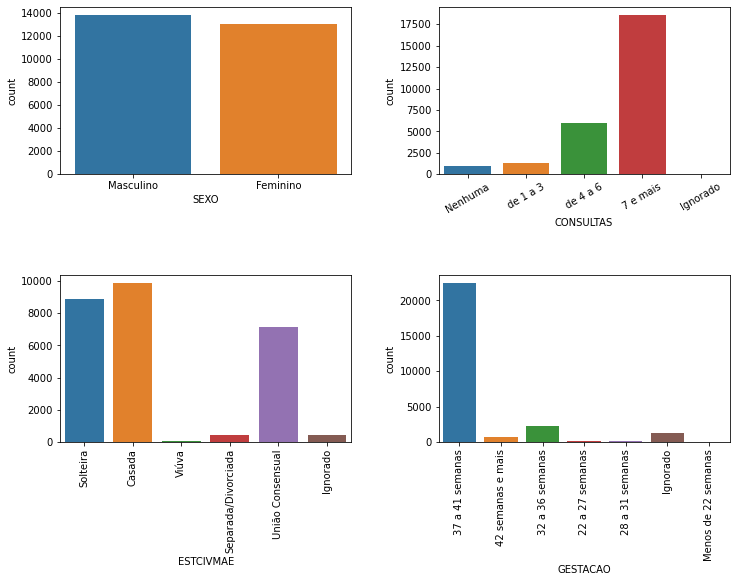

In [11]:
plt.close('all')
plt.rc('figure', figsize=(12,8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0,0], x='SEXO', data=sinasc)
ax2 = sns.countplot(ax = axes[0,1], x='CONSULTAS', data=sinasc)
ax3 = sns.countplot(ax = axes[1,0], x='ESTCIVMAE', data=sinasc)
ax4 = sns.countplot(ax = axes[1,1], x='GESTACAO', data=sinasc)

ax4.tick_params(axis='x', rotation=90)
ax2.set_xticklabels(['Nenhuma', 'de 1 a 3', 'de 4 a 6', '7 e mais', 'Ignorado'], rotation=30)
ax3.set_xticklabels(['Solteira', 'Casada', 'Viúva', 'Separada/Divorciada', 'União Consensual', 'Ignorado'], rotation = 90)


plt.subplots_adjust(wspace=0.3, hspace=0.6)